# Análise de Pedidos do Chipotle com Pandas

Utilizaremos o pandas para carregar e explorar um dataset real de pedidos feitos no restaurante Chipotle.

## 1. Importação das bibliotecas e leitura dos dados

In [14]:
import pandas as pd

# URL com os dados no formato TSV
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

# O formato TSV significa Tab-Separated Values — ou seja, um arquivo de texto plano onde os campos são separados por tabulações (em vez de vírgulas, como no CSV).

# Leitura com separador tabulação
chipo = pd.read_csv(url, sep='\t')

# Visualização inicial
print(chipo.head(10))
print(chipo.shape)
print(chipo.columns)
print(chipo.info())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

## 2. Qual é o item mais vendido?

Vamos agrupar os dados por `item_name`, somar a coluna numérica `quantity`. Depois, ordenar de forma decrescente.

In [34]:
mais_vendidos = chipo.groupby('item_name').sum('quantity')
mais_vendidos = mais_vendidos.sort_values('quantity', ascending=False)
print(mais_vendidos.head(5))

                     order_id  quantity
item_name                              
Chicken Bowl           713926       761
Chicken Burrito        497303       591
Chips and Guacamole    449959       506
Steak Burrito          328437       386
Canned Soft Drink      304753       351


## 3. Qual é o tipo (variação) mais vendido?

Agora faremos o mesmo agrupamento, mas por `choice_description`.

In [30]:
m = chipo.groupby('choice_description').sum('quantity')
n = m.sort_values('quantity', ascending=False)
print(n.head(5))

                                                    order_id  quantity
choice_description                                                    
[Diet Coke]                                           123455       159
[Coke]                                                122752       143
[Sprite]                                               80426        89
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese...     43088        49
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese...     36041        42


## 4. Quais são as marcas de refrigerantes vendidos como '6 Pack Soft Drink'?

Vamos primeiro verificar os itens únicos e depois filtramos apenas os pedidos com `'6 Pack Soft Drink'`.

In [36]:
# Verificando os tipos de item
print(chipo['item_name'].unique())

# Filtrando somente os refrigerantes
x1 = chipo[chipo['item_name'] == '6 Pack Soft Drink']
print(x1)

# Verificando as marcas
x2 = x1['choice_description'].unique()
print(x2)

['Chips and Fresh Tomato Salsa' 'Izze' 'Nantucket Nectar'
 'Chips and Tomatillo-Green Chili Salsa' 'Chicken Bowl' 'Side of Chips'
 'Steak Burrito' 'Steak Soft Tacos' 'Chips and Guacamole'
 'Chicken Crispy Tacos' 'Chicken Soft Tacos' 'Chicken Burrito'
 'Canned Soda' 'Barbacoa Burrito' 'Carnitas Burrito' 'Carnitas Bowl'
 'Bottled Water' 'Chips and Tomatillo Green Chili Salsa' 'Barbacoa Bowl'
 'Chips' 'Chicken Salad Bowl' 'Steak Bowl' 'Barbacoa Soft Tacos'
 'Veggie Burrito' 'Veggie Bowl' 'Steak Crispy Tacos'
 'Chips and Tomatillo Red Chili Salsa' 'Barbacoa Crispy Tacos'
 'Veggie Salad Bowl' 'Chips and Roasted Chili-Corn Salsa'
 'Chips and Roasted Chili Corn Salsa' 'Carnitas Soft Tacos'
 'Chicken Salad' 'Canned Soft Drink' 'Steak Salad Bowl'
 '6 Pack Soft Drink' 'Chips and Tomatillo-Red Chili Salsa' 'Bowl'
 'Burrito' 'Crispy Tacos' 'Carnitas Crispy Tacos' 'Steak Salad'
 'Chips and Mild Fresh Tomato Salsa' 'Veggie Soft Tacos'
 'Carnitas Salad Bowl' 'Barbacoa Salad Bowl' 'Salad' 'Veggie Cris

## 5. Quantos pedidos foram feitos?

Usamos `groupby('order_id')` e o `len()` para contar os pedidos únicos.

In [40]:
print(len(chipo.groupby('order_id')))
# Ou simplesmente:
print(chipo['order_id'].nunique())
# Ou ainda:
print(chipo['order_id'].max())

1834
1834
1834


## 6. Qual é a distribuição de itens por pedido?

Agrupamos por `order_id`, somamos os itens e extraímos estatísticas.

          quantity
order_id          
1                4
2                2
3                2
4                2
5                2
...            ...
1830             2
1831             3
1832             2
1833             2
1834             3

[1834 rows x 1 columns]
2.711014176663032
1.6776242381295476


<Axes: >

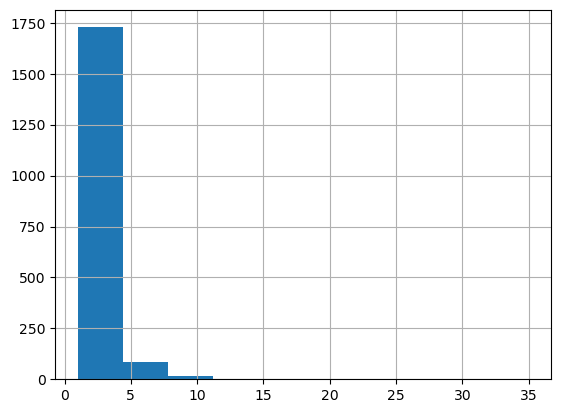

In [43]:
pedido_agrupado = chipo.groupby('order_id').sum(numeric_only=True)
print(pedido_agrupado)

# Estatísticas descritivas
print(pedido_agrupado['quantity'].mean())
print(pedido_agrupado['quantity'].std())

# Histograma
pedido_agrupado['quantity'].hist()